In [44]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path
import os
from PIL import Image
from paddleocr import PaddleOCR
from PIL import Image

In [2]:
img_dir = Path("images")
card_dir = img_dir/"Cards"
face_dir = img_dir/"Faces"

In [3]:
faces_img_name = [f for f in os.listdir(str(img_dir/"Faces")) if f.endswith(".png") or f.endswith(".jpg")]
cards_img_name = [f.replace("portrait", "front") for f in faces_img_name]

In [6]:
ocr = PaddleOCR(
    text_recognition_model_name="PP-OCRv5_mobile_rec",
    text_recognition_model_dir="./inference_76",
    use_textline_orientation=False,
    use_doc_orientation_classify=False,
    use_doc_unwarping=False,
)

Creating model: ('PP-OCRv5_server_det', None)
Model files already exist. Using cached files. To redownload, please delete the directory manually: `/home/namtt/.paddlex/official_models/PP-OCRv5_server_det`.


Creating model: ('PP-OCRv5_mobile_rec', './inference_76')


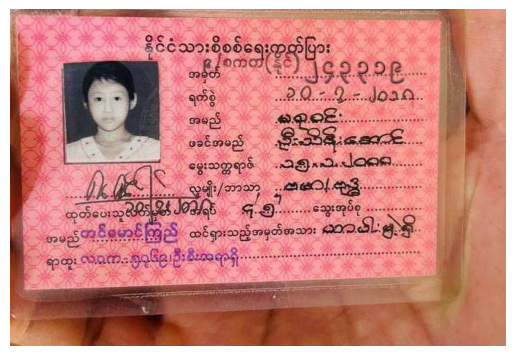

In [14]:
img_test = cards_img_name[6]
img = Image.open(card_dir/img_test)
plt.imshow(img)
plt.axis("off")
plt.show()

In [15]:
result = ocr.predict(str(card_dir/img_test))

In [16]:
print(result[0]['rec_texts'])

['ရ ', 'နိုင်င့သားစိုစစ်ရေးကကတ်ပြား', 'မ..၃.၃.၃.၉း', 'ရက်စွဲ့', '(.့.ဝယ-ဒး', 'အမည်', 'မရ့စဝင်း', 'ဖခင်အမည်', 'ပြီးသိနီးဆောင်', 'မွေးသကကရာ်', 'လစ လ်ယါတဋ', 'မိုိန််', 'လူမျိုး(ဘာသာ နစဖာ(်ရ်', 'ထုတ်ပေးသူသိမြိန် အရ်ရစယသွေးအုပ်စု', 'တမည်တင်စမောင်ကြည်ထင်ရှားသည့်အမှတ်အသား မောယ်ါးွ်ရိ်', 'ရာထူးလဏဏးွရ၆ြ၉/ဦးစီးထရောရှိ']


In [47]:
# image = cv2.imread(card_dir/img_test)
image = cv2.imread("image.png")
result = ocr.predict("image.png")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
boxes = [ele for ele in result[0]['rec_boxes']]
txts = [ele for ele in result[0]['rec_texts']]
scores = [ele for ele in result[0]['rec_scores']]

သန်ဘက်ခါ ကျောင်းပြန် ဖွင့်ပြီ။ (0.95)


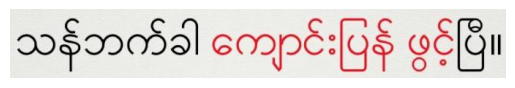

T၀ကဝrဝM Sင/ဝ၀/ Tဝာe၆. (0.71)


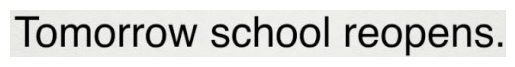

စားပွဲ အပေါ်မှာ စအုက် ရှိတယ်။ (0.97)


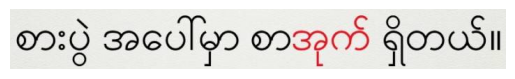

Tnere ၆ မ၄ 0ဝဝ/( ၀g Ghg (ai/eL (0.71)


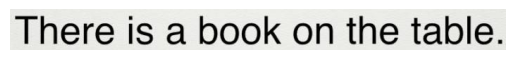

စားပွဲအောက် မှာ ဘောလုံးရှိတယ်။ (0.98)


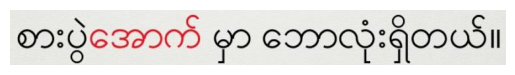

Tnere (၆ ၄ ၂0ai ပhါei Ghg (aioieL (0.67)


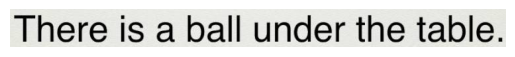

စားပွဲဘေးမှာ ဖိနက် ရှိတယ်။ (0.98)


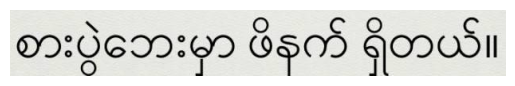

Tnere ahe Sshဝg၆ 0g(h G၀ Ghg Taioie. (0.71)


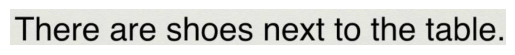

/၉,emSဇ7Tag) C၀၊n (0.51)


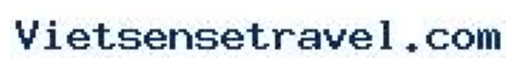

METSEMSင (0.84)


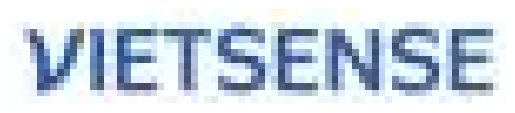

In [48]:
for box, text, score in zip(boxes, txts, scores):
    x1, y1, x2, y2 = np.array(box)
    img_crop = image[y1:y2, x1:x2]
    plt.imshow(img_crop)
    label = f"{text} ({score:.2f})"
    print(label)
    plt.axis("off")
    plt.show()
